# Emotion Analysis

In [1]:
# uploading required files 
from google.colab import files 
a = files.upload()

Saving test.txt to test.txt
Saving train.txt to train.txt
Saving val.txt to val.txt


In [2]:
# importing libraries 
import pandas as pd
import numpy as np 

In [3]:
df_train = pd.read_csv("/content/train.txt", header=None, sep=';', names=['Input', 'Sentiment'], encoding='utf-8')
df_train.sample(5)

,Input,Sentiment
13541,i know is my feelings were innocent,joy
3352,i read too much about discovery and exploratio...,joy
13938,i remember that i get those feelings back the ...,joy
8596,i am feeling disappointed at myself for making...,sadness
1129,i honestly believe those darker days are the r...,sadness


In [4]:
df_test = pd.read_csv("/content/test.txt", header=None, sep=';', names=['Input', 'Sentiment'], encoding='utf-8')
df_test.sample(5)

,Input,Sentiment
1782,i feel these days living in fears just another...,joy
582,im happy but i feel all this pressure to do on...,sadness
383,i feel so scared when the voices from there st...,fear
1138,i hate myself to feel so bothered by the word ...,anger
1518,i feel like it might just be ok,joy


In [5]:
# seeing all the unique values in target variable 
np.unique(df_train['Sentiment'])

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [6]:
# replacing the values of target variables 
df_train['Sentiment'].replace("anger", 0, inplace=True)
df_train['Sentiment'].replace("fear", 1, inplace=True)
df_train['Sentiment'].replace("joy", 2, inplace=True)
df_train['Sentiment'].replace("love", 3, inplace=True)
df_train['Sentiment'].replace("sadness", 4, inplace=True)
df_train['Sentiment'].replace("surprise", 5, inplace=True)                              

df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


## Data Visualization

Text(0.5, 1.0, 'Distribution of classes in sentiment column')

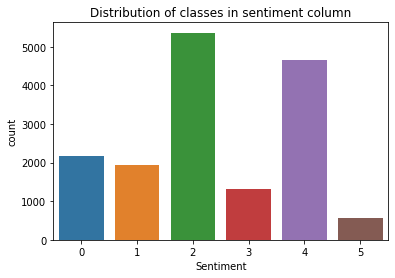

In [7]:
import seaborn as sns
sns.countplot(x='Sentiment', data=df_train).set_title("Distribution of classes in sentiment column")

Text(0.5, 1.0, 'Distribution of classes in sentiment column')

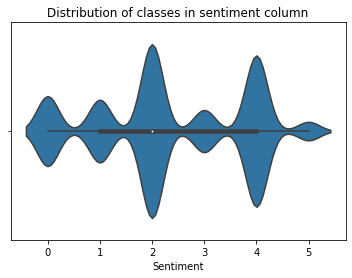

In [9]:
sns.violinplot(x='Sentiment', data=df_train).set_title("Distribution of classes in sentiment column")

## Pre-processing

In [10]:
# checking for null values 
df_train.isnull().sum()

Input        0
Sentiment    0
dtype: int64

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Sentiment,16000.0,2.381063,1.444121,0.0,1.0,2.0,4.0,5.0


In [14]:
# independent and dependent variables 
x = df_train['Input']
y = df_train['Sentiment']

x.shape, y.shape

((16000,), (16000,))

In [16]:
# converting the texts into integers
messages = x.copy()
voc_size = 10000

import re 
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]', ' ', messages[i])
  review = review.lower()
  review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

corpus[0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'  n   f e e l   h u l e'

In [17]:
# one_hot representation 
from tensorflow import keras 
from keras_preprocessing.text import one_hot

one_hot_rep = [one_hot(words, voc_size) for words in corpus]

one_hot_rep[0]

[6666, 3793, 7084, 7084, 8782, 9183, 3481, 8782, 7084]

In [19]:
from keras.preprocessing.sequence import pad_sequences
sent_length = 20
embedded_doc = pad_sequences(one_hot_rep, padding='post', maxlen=sent_length)
embedded_doc[0]

array([6666, 3793, 7084, 7084, 8782, 9183, 3481, 8782, 7084,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

## Model building

In [20]:
final_input = np.array(embedded_doc)
final_output = np.array(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_input, final_output, test_size=0.33, random_state=42)

In [22]:
from keras.models import Sequential 
from keras.layers import Embedding, Dense, Dropout, LSTM, Bidirectional

dim = 40
model = Sequential()
model.add(Embedding(voc_size, dim, input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='relu'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            400000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               112800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
168/168 [==============================] - 30s 49ms/step - loss: nan - accuracy: 0.1346 - val_loss: nan - val_accuracy: 0.1259
Epoch 2/10
168/168 [==============================] - 7s 41ms/step - loss: nan - accuracy: 0.1414 - val_loss: nan - val_accuracy: 0.1259
Epoch 3/10
168/168 [==============================] - 7s 41ms/step - loss: nan - accuracy: 0.1464 - val_loss: nan - val_accuracy: 0.1259
Epoch 4/10
168/168 [==============================] - 7s 41ms/step - loss: nan - accuracy: 0.1415 - val_loss: nan - val_accuracy: 0.1259
Epoch 5/10
168/168 [==============================] - 7s 42ms/step - loss: nan - accuracy: 0.1389 - val_loss: nan - val_accuracy: 0.1259
Epoch 6/10
168/168 [==============================] - 7s 41ms/step - loss: nan - accuracy: 0.1424 - val_loss: nan - val_accuracy: 0.1259
Epoch 7/10
168/168 [==============================] - 7s 41ms/step - loss: nan - accuracy: 0.1418 - val_loss: nan - val_accuracy: 0.1259
Epoch 8/10
168/168 [====================

## Suicide avoider

In [24]:
def suicide_avoider(x):
  ps=PorterStemmer()
  corpus=[]
  review=re.sub('[^a-zA-Z]',' ',x)
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

  voc_size = 5000
  one_hot_r = [one_hot(word,voc_size) for word in corpus]
  max_length = 20
  embedded_docs = pad_sequences(one_hot_r,max_length,padding='pre')

  dimension = 40
  model = Sequential()
  model.add(Embedding(voc_size,dimension,input_length=max_length))
  model.add(Bidirectional(LSTM(100)))
  model.add(Dense(1,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
  prediction= model.predict_classes(np.array(embedded_docs))
  
  if prediction.all() ==0:
    print("person is angry")
  elif prediction.all() ==1:
    print("person is in fear")
  elif prediction.all() ==2:
    print("person is in joy")
  elif prediction.all() ==3:
    print("person is in love")
  elif prediction.all() ==4:
    print("person is sad")
  else:
    print("person is surprise")

hello will get a job this month


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


person is in fear


In [25]:
x = str(input())
suicide_avoider(x)

will i get the offer letter today


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


person is in fear


In [29]:
x = str(input())
suicide_avoider(x)

i am in love


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


person is in fear
